# REGRESSION PROJECT
## Store Sales Prediction

## Hypothesis and Research Questions

* Null Hypothesis: Promotions have no significant effect on product sales.
* Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional periods.

Research questions: 
1)	What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?
2)	What store is the highest performer in terms of sales?
3)	What are the best-selling products per location?
4)	Does store size affect total sales?
5)	Which days have the most sales?


In [1]:
#%pip install seaborn 
#%pip install scikit-learn
#pip install plotly
#pip install --upgrade nbformat
#pip install missingno
#pip install statsmodels

In [149]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# import oil.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype


oil=pd.read_csv('oil.csv', parse_dates=['date'])

oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [4]:
# rename column 'dcoilwtico' to oil_price for easy reference

oil.rename(columns={'dcoilwtico':'oil_prices'}, inplace=True)
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [5]:
# import holidays_events.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

holidays_eve=pd.read_csv('holidays_events.csv', parse_dates=['date'])
holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


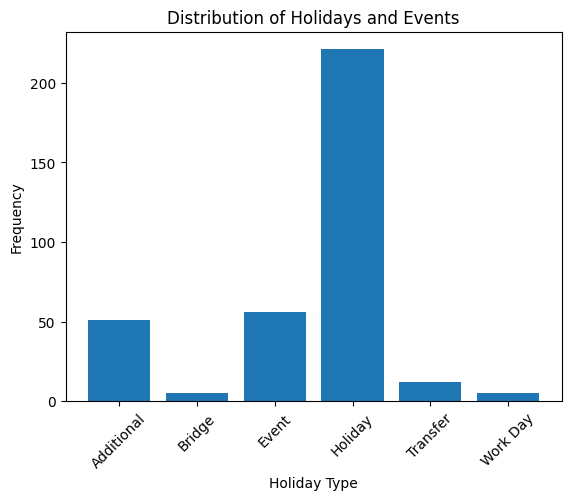

In [6]:
# create a bar plot visualization of the holidays event dataset

# Grouping by 'type' and counting occurrences of each 'locale'
locale_counts = holidays_eve.groupby('type')['locale'].count()

plt.bar(locale_counts.index, locale_counts.values)
plt.xlabel('Holiday Type')
plt.ylabel('Frequency')
plt.title('Distribution of Holidays and Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [7]:
# import stores.csv with a pd.read_csv
# and display columns, Non-Null, and datatype with .info()


stores=pd.read_csv('stores.csv')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


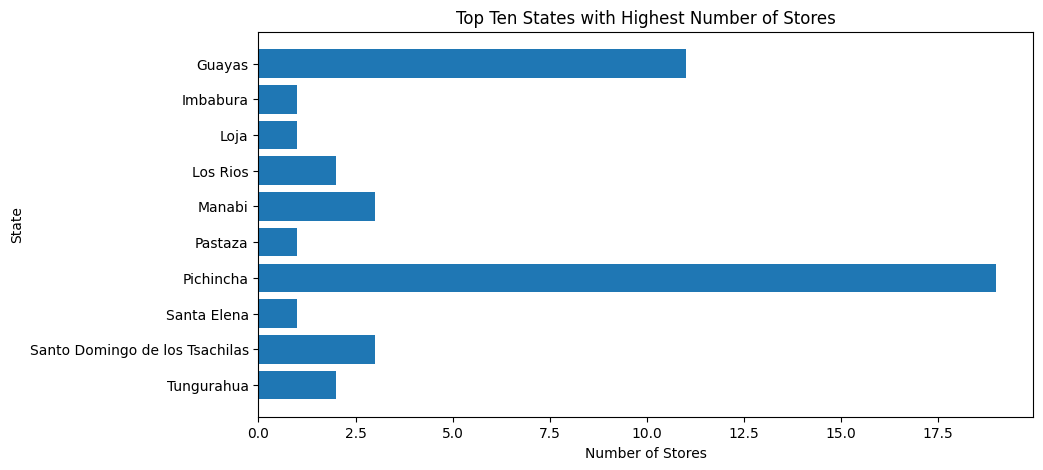

In [8]:
# Grouping by state and counting the number of stores
state_counts = stores.groupby('state')['store_nbr'].count()

grouped_state_counts = state_counts.sort_index(ascending=False)

# Selecting the top ten states
top_ten_states = grouped_state_counts.head(10)

# Creating a horizontal bar plot for top ten states
plt.figure(figsize=(10, 5))
plt.barh(top_ten_states.index, top_ten_states.values)
plt.ylabel('State')
plt.xlabel('Number of Stores')
plt.title('Top Ten States with Highest Number of Stores')
plt.show()

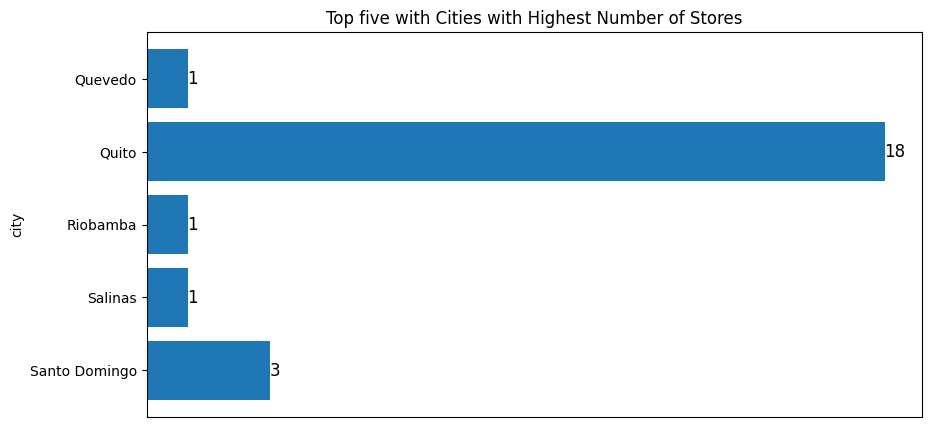

In [9]:
# Grouping by state and counting the number of stores
city_counts = stores.groupby('city')['store_nbr'].count()

grouped_city_counts = city_counts.sort_index(ascending=False)

# Selecting the top ten states
top_five_city = grouped_city_counts.head()

# Creating a horizontal bar plot for top ten states
plt.figure(figsize=(10, 5))
plt.barh(top_five_city.index, top_five_city.values)
plt.ylabel('city')
plt.xlabel('Number of Stores')
plt.title('Top five with Cities with Highest Number of Stores')

# Adding data values on each bar
for index, value in enumerate(top_five_city.values):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black')

# Remove the x-axis
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()


In [10]:
# import transactions.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

transactions=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\transactions.csv', parse_dates=['date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [11]:
# Grouping by store_nbr and summing the transactions
transactions_grouped = transactions.groupby('store_nbr')['transactions'].sum()
# Series contains the sum of transactions for each store number. 
# Sorting the results in descending order based on the sum of transactions
transactions_sorted = transactions_grouped.sort_values(ascending=False)
#Top five stores with highest transactions
top_five_stores = transactions_sorted.head(5)

top_five_stores

store_nbr
44    7273093
47    6535810
45    6201115
46    5990113
3     5366350
Name: transactions, dtype: int64

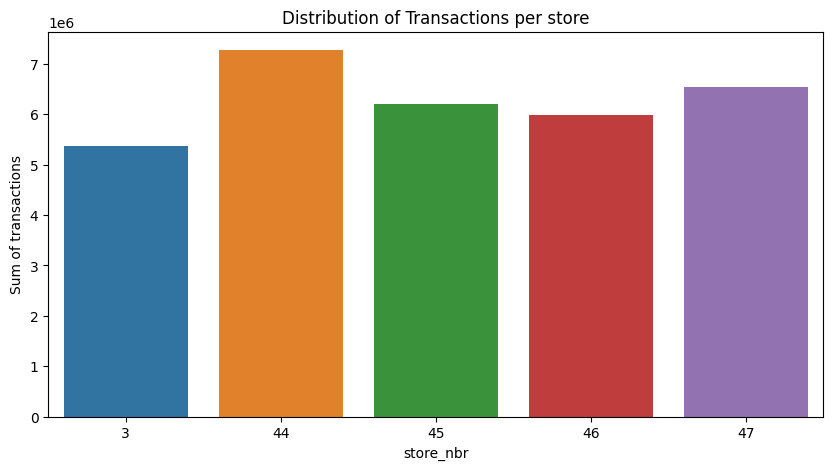

In [12]:
plt.figure(figsize=(10,5))
plt.xlabel('store number')
plt.ylabel('Sum of transactions')
plt.title('Distribution of Transactions per store')
sns.barplot(x=top_five_stores.index, y=top_five_stores.values)
plt.show()

In [13]:
# import test.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

test=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\test.csv', parse_dates=['date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [14]:
# import train.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

train=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\train.csv', parse_dates=['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


# Date ranges
Check date ranges of imported datasets

In [15]:
# check range of dates for oil.csv

oil['date'].min(), oil['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

<Axes: >

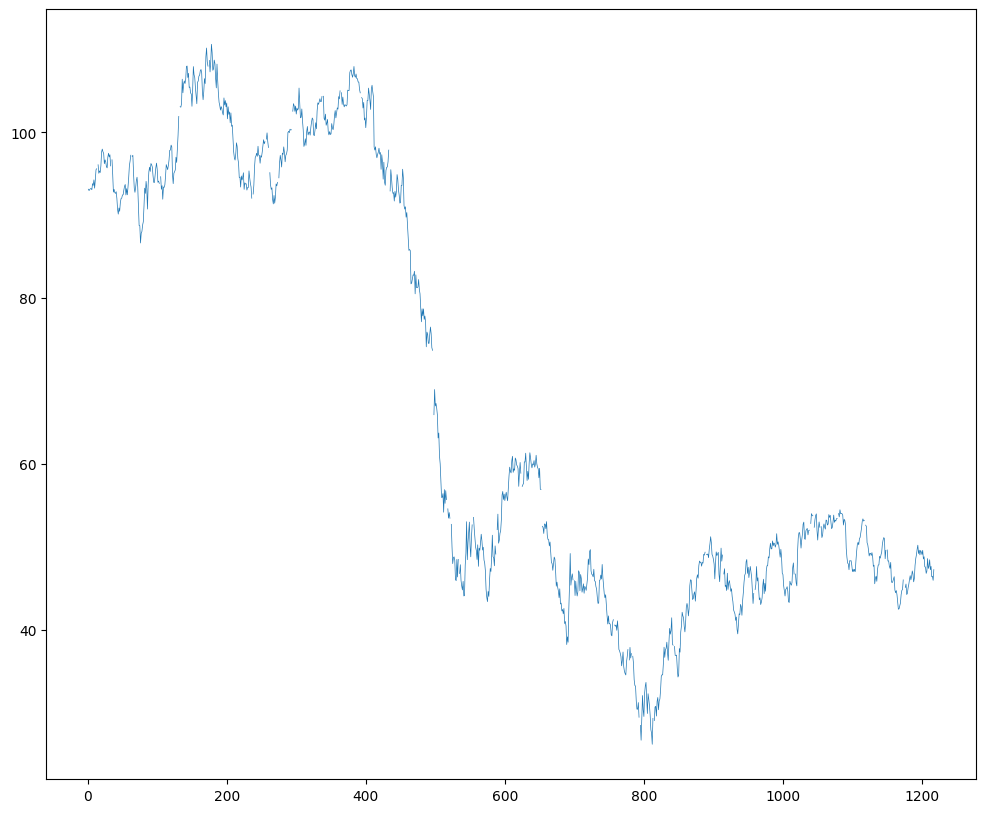

In [16]:
# visualize oil data

plt.figure(figsize=(12,10))
oil['oil_prices'].plot(linewidth=0.5)

In [17]:
#visualize oil prices with a date slider for close observation

fig = px.line(oil,x='date', y='oil_prices', title='Daily Crude Oil Prices from 2013 to 2017')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [19]:
# check range of dates for test.csv

test['date'].min(), test['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [20]:
# check range of dates for train.csv

train['date'].min(), train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [22]:
0

0

In [23]:
# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

oil_test_start_date= '2017-08-16'
oil_test_end_date= '2017-08-31'

oil_train = oil[oil['date'] < oil_test_start_date]
oil_test = oil[oil['date'].between (oil_test_start_date, oil_test_end_date)]

# Verify the split
range_oil_test = oil_test['date'].min(), oil_test['date'].max()
range_oil_train = oil_train['date'].min(), oil_train['date'].max()

print(range_oil_test)
print(range_oil_train)


(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [24]:
# merge test and oil_test on 'date'

merged_test = pd.merge(test, oil_test, on='date', how='left')
print(merged_test.head())

        id       date  store_nbr      family  onpromotion  oil_prices
0  3000888 2017-08-16          1  AUTOMOTIVE            0   46.799999
1  3000889 2017-08-16          1   BABY CARE            0   46.799999
2  3000890 2017-08-16          1      BEAUTY            2   46.799999
3  3000891 2017-08-16          1   BEVERAGES           20   46.799999
4  3000892 2017-08-16          1       BOOKS            0   46.799999


In [25]:
#check for null or missing values

merged_test.isnull().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
oil_prices     7128
dtype: int64

In [26]:
# calculate the percentage of missing data against the total values

mis_test_value_percent = 100*merged_test.isnull().sum()/len(merged_test)
print(mis_test_value_percent)

id              0.0
date            0.0
store_nbr       0.0
family          0.0
onpromotion     0.0
oil_prices     25.0
dtype: float64


We have a 25 percent missing values in oil_prices due to the merging. Though the initial oil_test had no missing values. This can be solved with forward filling missing values

In [27]:
# forward fill missing 'oil_prices' 

forward_filled_merge_test = merged_test['oil_prices'].fillna(method='ffill', inplace=True)
print(forward_filled_merge_test)

None


In [28]:
merged_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
dtype: int64

In [29]:
#display random sample of 10 rows

merged_test.sample(10, random_state = 0)

,id,date,store_nbr,family,onpromotion,oil_prices
12290,3013178,2017-08-22,53,HARDWARE,0,47.650002
4348,3005236,2017-08-18,30,PERSONAL CARE,7,48.590000
6617,3007505,2017-08-19,44,HOME APPLIANCES,0,48.590000
13693,3014581,2017-08-23,42,SCHOOL AND OFFICE SUPPLIES,0,48.450001
3008,3003896,2017-08-17,43,BREAD/BAKERY,8,47.070000
12793,3013681,2017-08-23,18,"LIQUOR,WINE,BEER",3,48.450001
5078,3005966,2017-08-18,50,PREPARED FOODS,0,48.590000
8487,3009375,2017-08-20,47,CELEBRATION,0,48.590000
24504,3025392,2017-08-29,46,HOME CARE,5,46.459999
8184,3009072,2017-08-20,39,AUTOMOTIVE,0,48.590000


<Axes: >

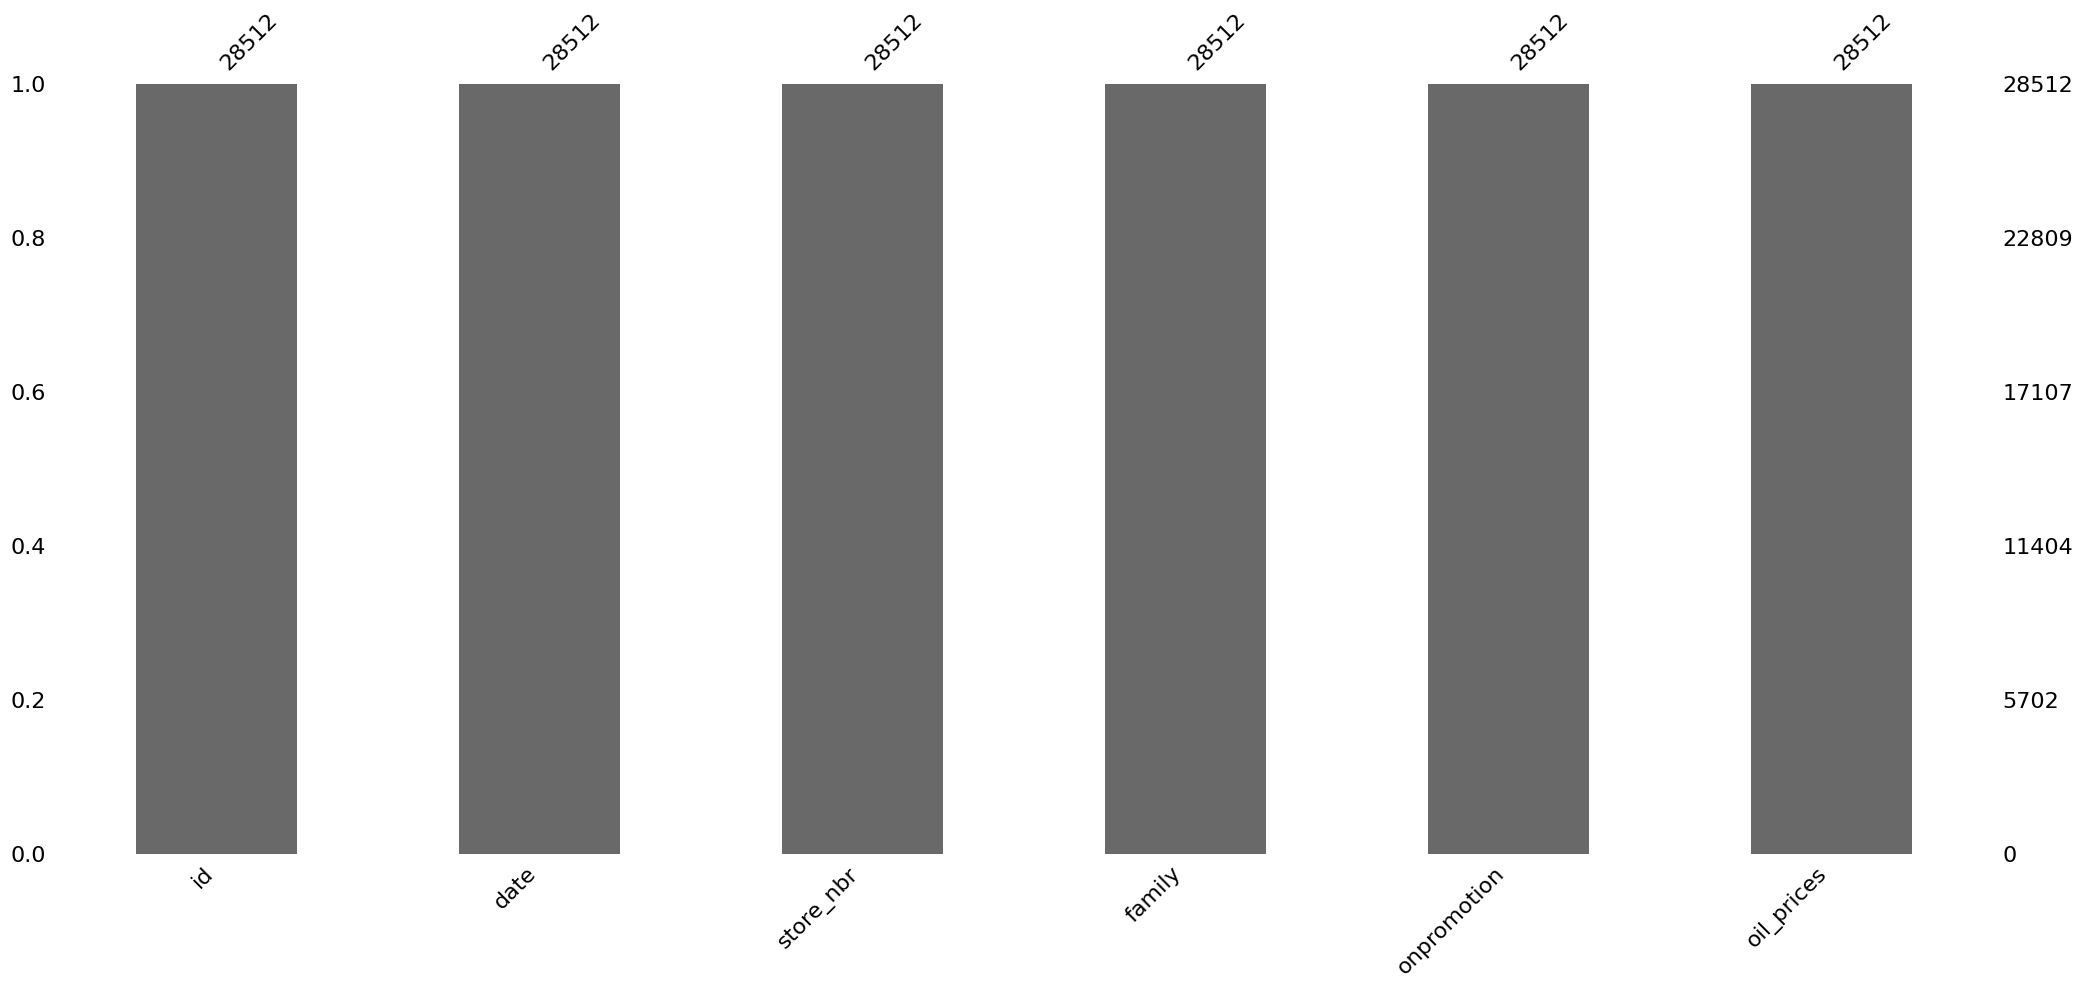

In [30]:
msno.bar(merged_test)

In [31]:
# check for null values of the oil_train dataset

oil_train.isnull().sum()

date           0
oil_prices    43
dtype: int64

In [32]:
# Interpolate missing values using linear interpolation
# interpolation method used to capture local trends because there were few missing values within a relatively stable trend

oil_train_interpolated = oil_train.interpolate(method='linear')

In [33]:
# check missing values

oil_train_interpolated.isnull().sum()

date          0
oil_prices    1
dtype: int64

In [34]:
# back fill missing data at the beginning of dataset 
# check if missing data is filled

oil_train_interpolated['oil_prices'].fillna(method='bfill', inplace=True)
oil_train_interpolated.isnull().sum()

date          0
oil_prices    0
dtype: int64

In [35]:
# merge train and oil_train_interpolated datasets
# print merged dataset to see if successfull

merged_train = pd.merge(oil_train_interpolated, train, on='date', how='right')
print(merged_train.head())

        date  oil_prices  id  store_nbr      family  sales  onpromotion
0 2013-01-01   93.139999   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   93.139999   1          1   BABY CARE    0.0            0
2 2013-01-01   93.139999   2          1      BEAUTY    0.0            0
3 2013-01-01   93.139999   3          1   BEVERAGES    0.0            0
4 2013-01-01   93.139999   4          1       BOOKS    0.0            0


In [36]:
merged_train.shape

(3000888, 7)

In [37]:
# check for missing values in merged dataset

merged_train.isnull().sum()

date                0
oil_prices     857142
id                  0
store_nbr           0
family              0
sales               0
onpromotion         0
dtype: int64

<Axes: >

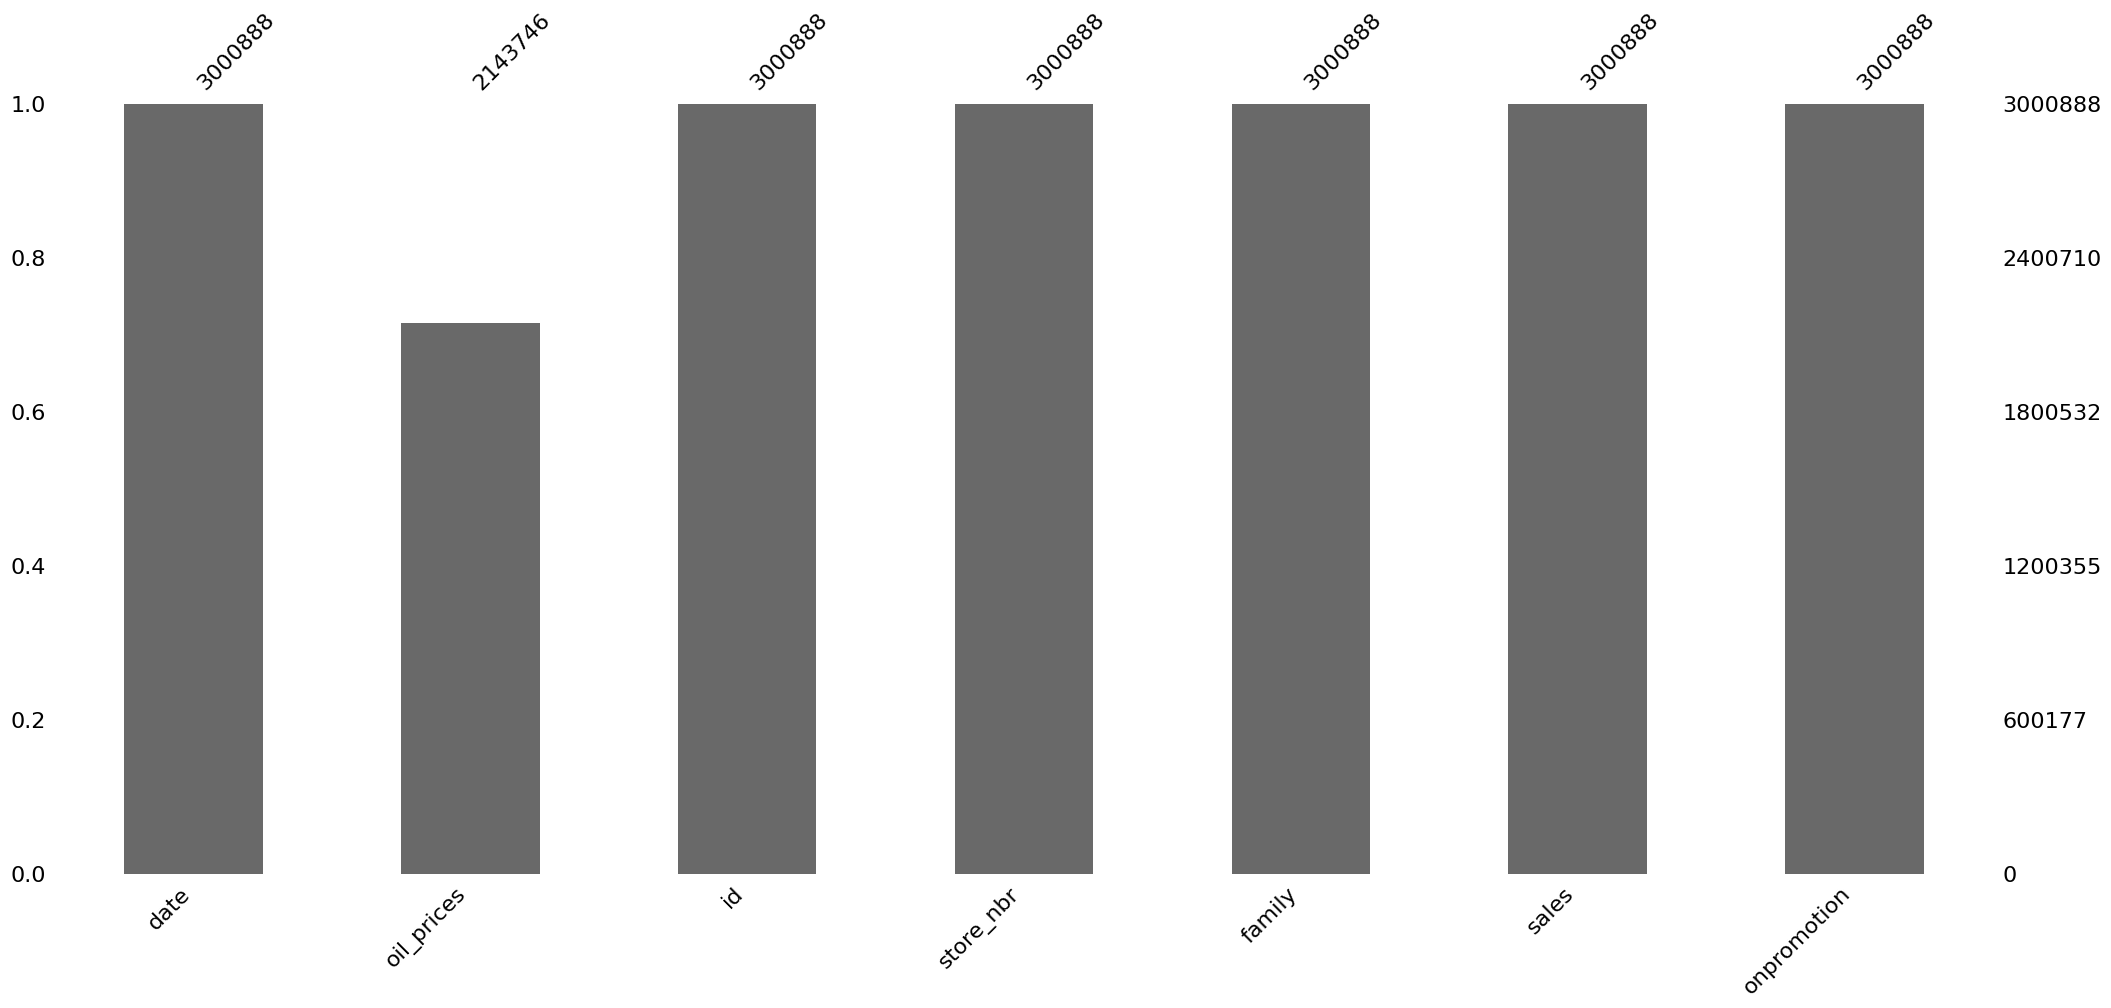

In [38]:
msno.bar(merged_train)

In [39]:
# calculate the percentage of missing data against the total values
# we observe a 28.5% missing data in oil_prices column

mis_train_value_percent = 100*merged_train.isnull().sum()/len(merged_train)
print(mis_train_value_percent)

date            0.000000
oil_prices     28.562945
id              0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
dtype: float64


<Axes: >

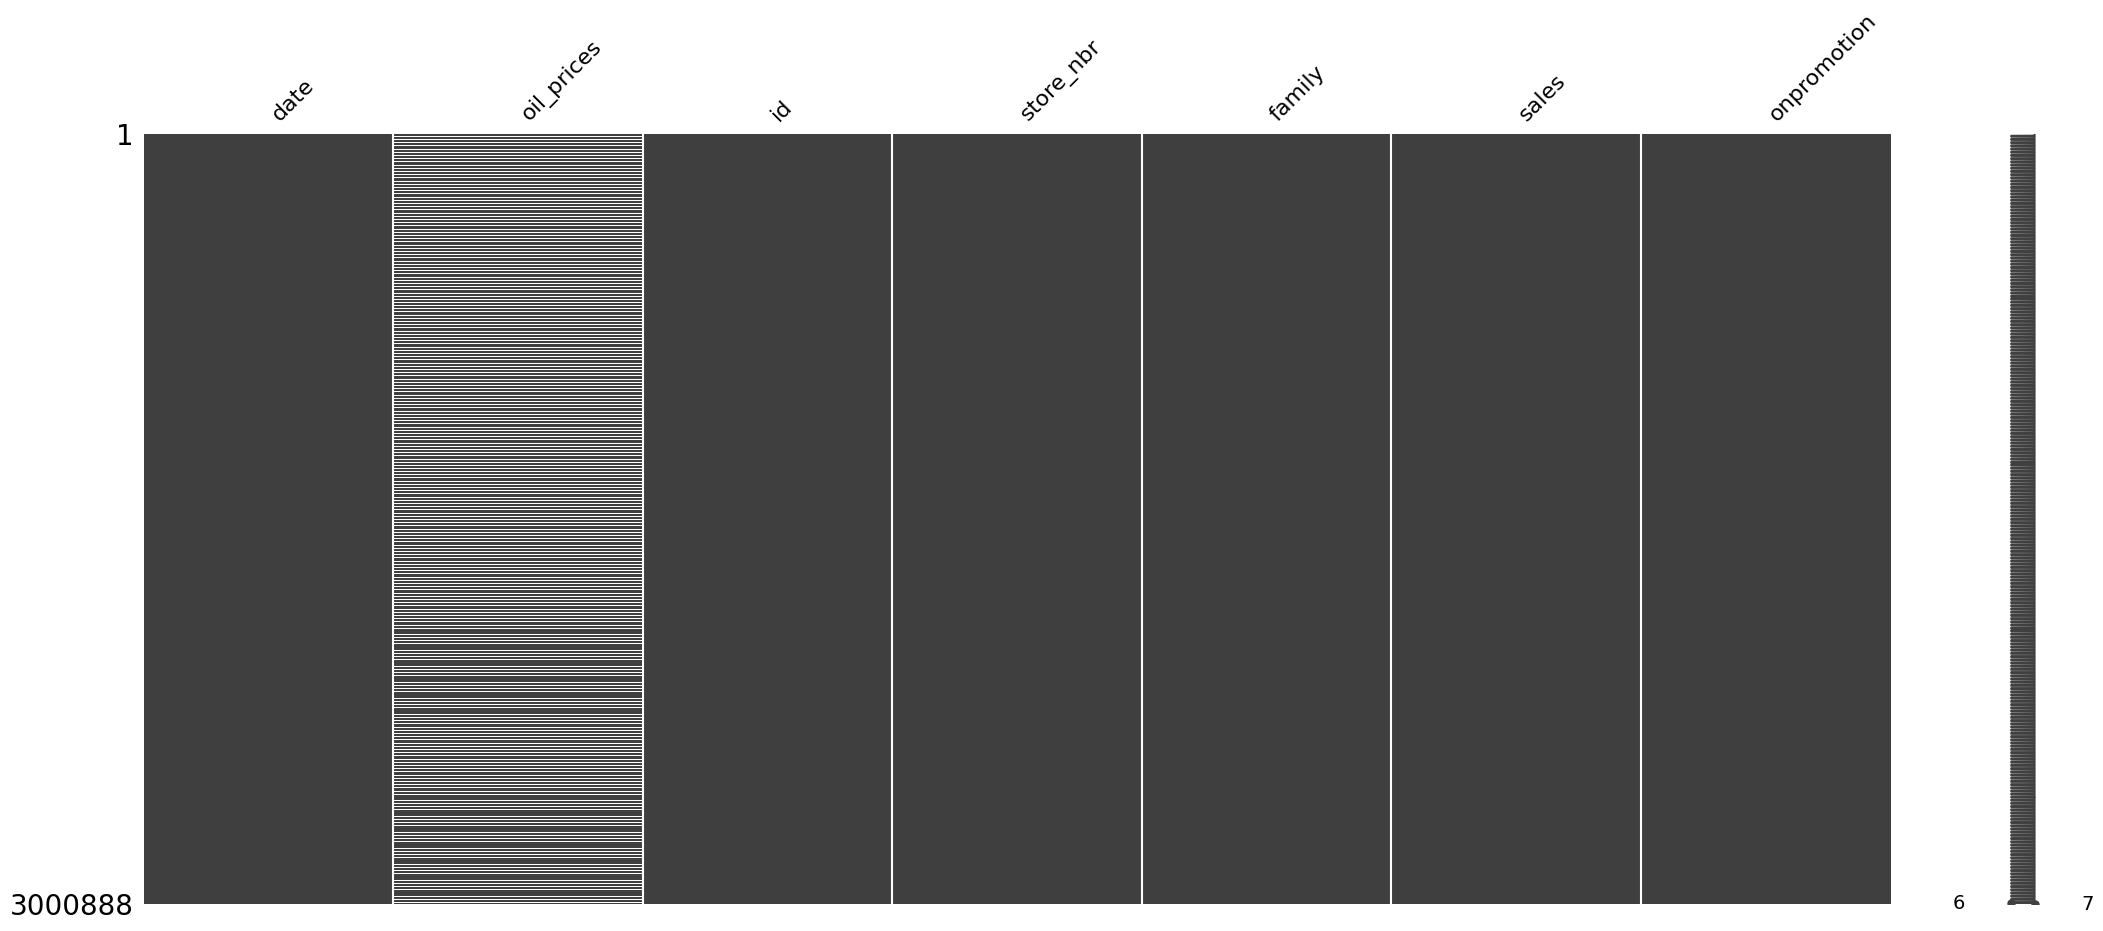

In [40]:
# plot a matrix visualization of missing values in merged train
# check how the missing date is distributed through our merged data
# missing data in the oil_prices columns shows a missing at random

msno.matrix(merged_train)

In [41]:
merged_train.shape

(3000888, 7)

In [42]:
#look at missing rows in merged_train

merged_train.query('oil_prices != oil_prices')

,date,oil_prices,id,store_nbr,family,sales,onpromotion
7128,2013-01-05,NaN,7128,1,AUTOMOTIVE,5.000,0
7129,2013-01-05,NaN,7129,1,BABY CARE,0.000,0
7130,2013-01-05,NaN,7130,1,BEAUTY,3.000,0
7131,2013-01-05,NaN,7131,1,BEVERAGES,1160.000,0
7132,2013-01-05,NaN,7132,1,BOOKS,0.000,0
...,...,...,...,...,...,...,...
2997319,2017-08-13,NaN,2997319,9,POULTRY,412.458,0
2997320,2017-08-13,NaN,2997320,9,PREPARED FOODS,105.169,1
2997321,2017-08-13,NaN,2997321,9,PRODUCE,1693.607,7
2997322,2017-08-13,NaN,2997322,9,SCHOOL AND OFFICE SUPPLIES,200.000,8


In [43]:
# check the shape of merged_train

merged_train.shape

(3000888, 7)

In [44]:
# forward fill missing 'oil_prices' 

forward_filled_merge_train = merged_train['oil_prices'].fillna(method='ffill', inplace=True)
print(forward_filled_merge_train)

None


In [45]:
merged_train.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [46]:
merged_train.head()

,date,oil_prices,id,store_nbr,family,sales,onpromotion
0,2013-01-01,93.139999,0,1,AUTOMOTIVE,0.0,0
1,2013-01-01,93.139999,1,1,BABY CARE,0.0,0
2,2013-01-01,93.139999,2,1,BEAUTY,0.0,0
3,2013-01-01,93.139999,3,1,BEVERAGES,0.0,0
4,2013-01-01,93.139999,4,1,BOOKS,0.0,0


In [47]:
merged_test['store_nbr'].nunique()

54

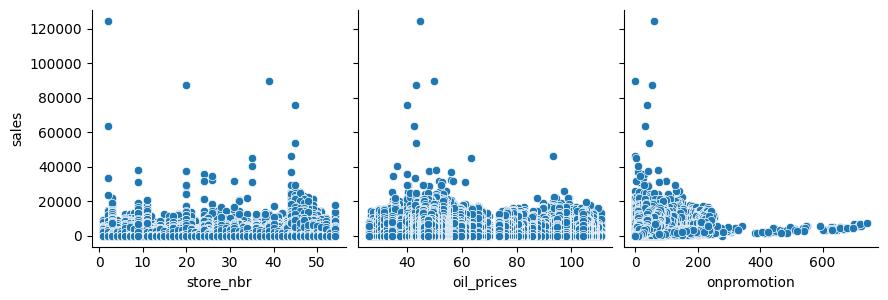

In [48]:
# Pair plot between store_nbr, oil prices, and onpromotion

sns.pairplot(merged_train,x_vars=['store_nbr','oil_prices','onpromotion'],y_vars=['sales'],height=3,aspect=1)
plt.show()

In [49]:
merged_train['family'].nunique()

33

<Axes: xlabel='date', ylabel='sales'>

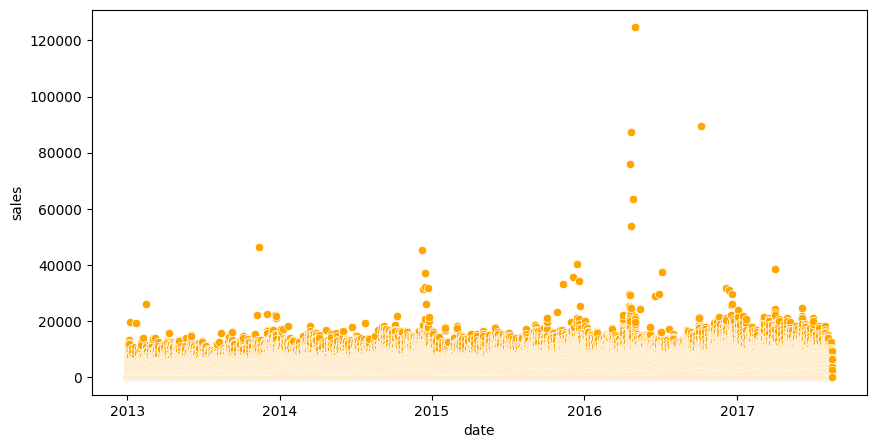

In [50]:
a=merged_train['date']
b=merged_train['sales']
plt.figure(figsize=(10,5))
sns.scatterplot(x=a,y=b,color='orange')

<Axes: xlabel='oil_prices', ylabel='sales'>

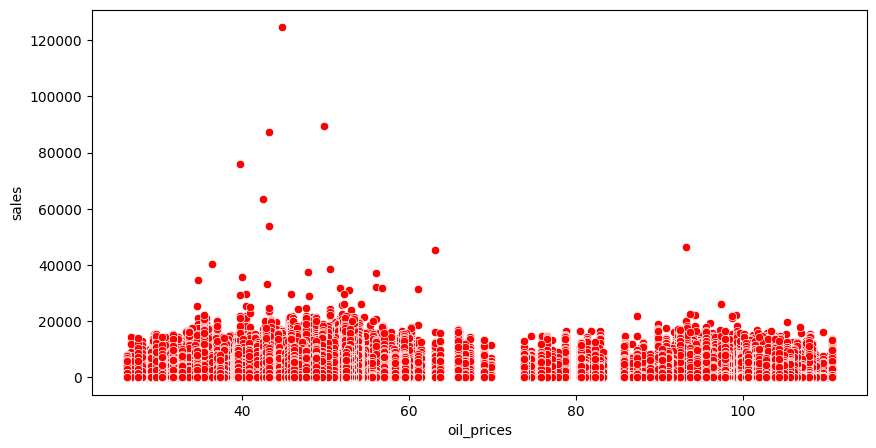

In [51]:
a=merged_train['oil_prices']
b=merged_train['sales']
plt.figure(figsize=(10,5))
sns.scatterplot(x=a,y=b,color='red')

In [52]:
#shapes of transactions and stores

transaction_shape = transactions.shape
store_shape = stores.shape

print('transactions shape is :', transaction_shape )
print('stores shape is : ', store_shape)

transactions shape is : (83488, 3)
stores shape is :  (54, 5)


In [53]:
# join stores and transactions on 'store_nbr' since the both have this column
# after merging we will move forward to merge these on train and test dataset based on dates

store_nbr_stores=stores['store_nbr'].nunique()
store_nbr_transactions=transactions['store_nbr'].nunique()

print('Unique store numbers in stores',store_nbr_stores )
print('Unique store numbers in transactions',store_nbr_transactions )

Unique store numbers in stores 54
Unique store numbers in transactions 54


In [54]:
# join transactions and stores on 'store_nbr'

merged_transactions_store = pd.merge(transactions, stores, on='store_nbr', how='left')
merged_transactions_store.shape


(83488, 7)

In [55]:
# check missing values in merged transactions and store

merged_transactions_store.isnull().sum()

date            0
store_nbr       0
transactions    0
city            0
state           0
type            0
cluster         0
dtype: int64

In [56]:
merged_transactions_store['cluster'].nunique()

17

In [57]:
merged_transactions_store['transactions'].head()

0     770
1    2111
2    2358
3    3487
4    1922
Name: transactions, dtype: int64

In [58]:
merged_transactions_store['city'].nunique()

22

In [59]:
merged_transactions_store.shape

(83488, 7)

In [60]:
# we want to merge merged_transactions_store and (oil_test and oil_train)
# so we check the date range of merged_transactions_store, oil_test, and oil_train

range_merged_transaction_store = merged_transactions_store['date'].min(), merged_transactions_store['date'].max()
print('range of merged transaction',range_merged_transaction_store)
print('range of oil_test:',range_oil_test)
print('range of oil_train:',range_oil_train)

range of merged transaction (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))
range of oil_test: (Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
range of oil_train: (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [61]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [62]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [63]:
holidays_eve['date'].min(), holidays_eve['date'].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [64]:
print('range of oil_test:',range_oil_test)
print('range of oil_train:',range_oil_train)

range of oil_test: (Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
range of oil_train: (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [65]:
holidays_eve.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [66]:
holidays_eve['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [67]:
holidays_eve.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [68]:
# Create a copy of 'holidays_eve'

copied_holidays_eve= holidays_eve.copy()
copied_holidays_eve.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [69]:
copied_holidays_eve.set_index('date', inplace=True)


In [70]:
copied_holidays_eve.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [71]:
copied_holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2012-03-02 to 2017-12-26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         350 non-null    object
 1   locale       350 non-null    object
 2   locale_name  350 non-null    object
 3   description  350 non-null    object
 4   transferred  350 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 14.0+ KB


In [72]:
# Drop columns Locale, locale_name, and description using the 'drop' method
# since these will not be needed because they have been captured in other columns



columns_to_drop = ['locale', 'locale_name','description']

holidays_eve_droped = holidays_eve.drop(columns=columns_to_drop)

print(holidays_eve_droped)

          date        type  transferred
0   2012-03-02     Holiday        False
1   2012-04-01     Holiday        False
2   2012-04-12     Holiday        False
3   2012-04-14     Holiday        False
4   2012-04-21     Holiday        False
..         ...         ...          ...
345 2017-12-22  Additional        False
346 2017-12-23  Additional        False
347 2017-12-24  Additional        False
348 2017-12-25     Holiday        False
349 2017-12-26  Additional        False

[350 rows x 3 columns]


In [73]:
# Check for duplicates in the entire DataFrame
# print out duplicate dates for inspection

duplicates = holidays_eve_droped[holidays_eve_droped.duplicated()]

if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates.")

Duplicates found:
          date     type  transferred
8   2012-06-25  Holiday        False
9   2012-06-25  Holiday        False
11  2012-07-03  Holiday        False
59  2013-06-25  Holiday        False
60  2013-06-25  Holiday        False
62  2013-07-03  Holiday        False
111 2014-06-25  Holiday        False
112 2014-06-25  Holiday        False
119 2014-07-03  Holiday        False
177 2015-06-25  Holiday        False
178 2015-06-25  Holiday        False
180 2015-07-03  Holiday        False
245 2016-05-08    Event        False
259 2016-06-25  Holiday        False
260 2016-06-25  Holiday        False
262 2016-07-03  Holiday        False
306 2017-04-14  Holiday        False
316 2017-06-25  Holiday        False
317 2017-06-25  Holiday        False
319 2017-07-03  Holiday        False


In [74]:
# Drop duplicate rows using a .drop_duplicates
# the resulting dataframe contains only unique rows


holidays_eve_droped_duplicates = holidays_eve_droped.drop_duplicates()

print(holidays_eve_droped_duplicates)

          date        type  transferred
0   2012-03-02     Holiday        False
1   2012-04-01     Holiday        False
2   2012-04-12     Holiday        False
3   2012-04-14     Holiday        False
4   2012-04-21     Holiday        False
..         ...         ...          ...
345 2017-12-22  Additional        False
346 2017-12-23  Additional        False
347 2017-12-24  Additional        False
348 2017-12-25     Holiday        False
349 2017-12-26  Additional        False

[330 rows x 3 columns]


In [75]:
# compare the shape of those with duplicates and those without duplicates
# we see we dropped 20 rows that were duplicates

print(holidays_eve_droped.shape)
print(holidays_eve_droped_duplicates.shape)


(350, 3)
(330, 3)


In [76]:
# Create a copy of the holidays_eve_droped_duplicates
# This is to make 'date' an index for better manipulation and analysis using the copy created

holidays_eve_droped_duplicates_copy = holidays_eve_droped_duplicates.copy()


In [77]:
# Set the 'Date' column as the index

holidays_eve_droped_duplicates_copy.set_index('date', inplace=True)

In [78]:
# Get a specific year and month
# this gives the year and the whole month, from the begining to the end of month

holidays_eve_droped_duplicates_copy.loc['2017-08']


,type,transferred
date,,
2017-08-05,Holiday,False
2017-08-10,Holiday,True
2017-08-11,Transfer,False
2017-08-15,Holiday,False
2017-08-24,Holiday,False


In [79]:
# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

holidays_eve_test_start_date= '2017-08-16'
holidays_eve_test_end_date= '2017-08-31'

holidays_eve_train_start_date= '2013-01-01'
holidays_eve_train_end_date= '2017-08-15'

holidays_eve_train = holidays_eve_droped_duplicates[holidays_eve_droped_duplicates['date'].between (holidays_eve_train_start_date, holidays_eve_train_end_date)]
holidays_eve_test = holidays_eve_droped_duplicates[holidays_eve_droped_duplicates['date'].between (holidays_eve_test_start_date, holidays_eve_test_end_date)]

# Verify the split
range_holidays_eve_test = holidays_eve_test['date'].min(), holidays_eve_test['date'].max()
range_holidays_eve_train = holidays_eve_train['date'].min(), holidays_eve_train['date'].max()

print(range_holidays_eve_test)
print(range_holidays_eve_train)

(Timestamp('2017-08-24 00:00:00'), Timestamp('2017-08-24 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [80]:
# print shapes of splitted holidays events based on train and test date ranges

print(holidays_eve_train.shape)
print(holidays_eve_test.shape)

(269, 3)
(1, 3)


In [81]:
holidays_eve_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 41 to 326
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         269 non-null    datetime64[ns]
 1   type         269 non-null    object        
 2   transferred  269 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(1)
memory usage: 6.6+ KB


In [82]:
# merge merged_train and holidays_eve_train datasets on 'date'
# merge merged_test and holidays_eve_test datasets on 'date'

merged_train_holidays_eve = pd.merge(merged_train, holidays_eve_train, on='date', how='left')
merged_test_holidays_eve = pd.merge(merged_test, holidays_eve_test, on='date', how='left')

In [83]:
print(merged_train.shape)
print(merged_train_holidays_eve.shape)

(3000888, 7)
(3024054, 9)


In [84]:
merged_train_holidays_eve.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type           2551824
transferred    2551824
dtype: int64

In [85]:
merged_train_holidays_eve.head()

,date,oil_prices,id,store_nbr,family,sales,onpromotion,type,transferred
0,2013-01-01,93.139999,0,1,AUTOMOTIVE,0.0,0,Holiday,False
1,2013-01-01,93.139999,1,1,BABY CARE,0.0,0,Holiday,False
2,2013-01-01,93.139999,2,1,BEAUTY,0.0,0,Holiday,False
3,2013-01-01,93.139999,3,1,BEVERAGES,0.0,0,Holiday,False
4,2013-01-01,93.139999,4,1,BOOKS,0.0,0,Holiday,False


In [86]:
#display random sample of 10 rows

merged_train_holidays_eve.sample(10, random_state = 0)

,date,oil_prices,id,store_nbr,family,sales,onpromotion,type,transferred
1502234,2015-04-21,55.580002,1493324,1,DAIRY,677.000,1,Holiday,False
2063297,2016-02-29,32.740002,2052605,51,BREAD/BAKERY,878.264,3,NaN,NaN
511115,2013-10-13,102.169998,509333,5,FROZEN FOODS,103.000,0,NaN,NaN
2115519,2016-03-30,36.910000,2104827,17,LINGERIE,1.000,0,NaN,NaN
643892,2013-12-27,99.940002,640328,25,PREPARED FOODS,160.000,0,NaN,NaN
3010698,2017-08-08,49.070000,2987532,34,DELI,209.011,4,NaN,NaN
2370638,2016-08-15,45.720001,2351036,25,HOME APPLIANCES,0.000,0,Holiday,False
1160033,2014-10-11,85.870003,1154687,8,HOME APPLIANCES,3.000,0,NaN,NaN
1720885,2015-08-21,40.450001,1711975,44,BABY CARE,0.000,0,NaN,NaN
1522792,2015-05-02,59.099998,1513882,36,CLEANING,1433.000,2,NaN,NaN


<Axes: >

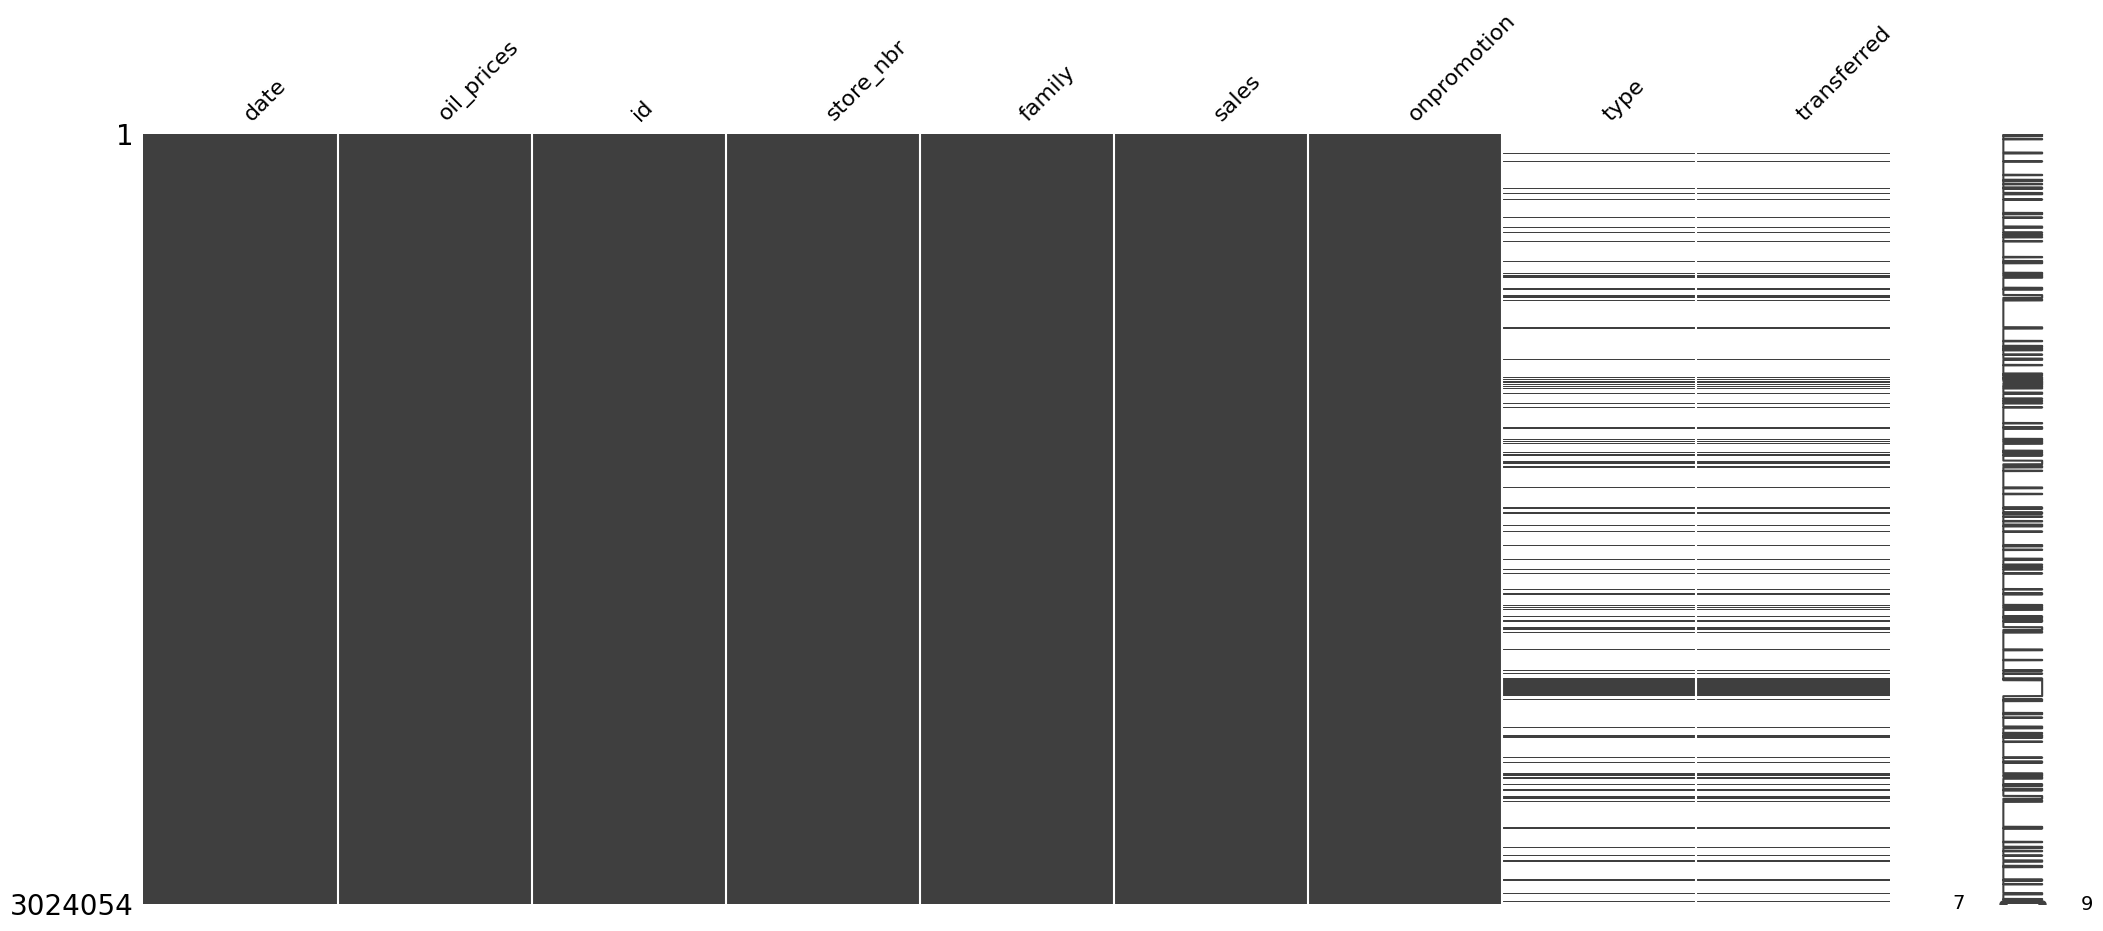

In [87]:
# plot a matrix visualization of missing values in merged_train_holidays_eve_copy
# check how the missing date is distributed through our merged data

msno.matrix(merged_train_holidays_eve)

Since the holiday event dataset captures the all the holidays in the country over the date range we fill missing data with 'Work Day' in the 'type' column and fill 'false' for 'transferred' column. 

In [88]:
# Fill missing values in the 'transferred' column with 'false' since all holidays were captured in holiday_eve dataset
# Fill missing values in the 'type' column with 'not_holiday'

merged_train_holidays_eve['transferred'].fillna(False, inplace=True)
merged_train_holidays_eve['type'].fillna('Work Day', inplace=True)

merged_train_holidays_eve.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
type           0
transferred    0
dtype: int64

In [89]:
print(merged_test.shape)
print(merged_test_holidays_eve.shape)

(28512, 6)
(28512, 8)


In [90]:
# Create a copy of the holidays_eve_droped_duplicates
merged_test_holidays_eve_copy = merged_test_holidays_eve.copy()

In [91]:
merged_test_holidays_eve_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_prices   28512 non-null  float64       
 6   type         1782 non-null   object        
 7   transferred  1782 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.7+ MB


In [92]:
merged_test_holidays_eve_copy.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices         0
type           26730
transferred    26730
dtype: int64

In [93]:
# Set the 'Date' column as the index

merged_test_holidays_eve_copy.set_index('date', inplace=True)

In [94]:
merged_test_holidays_eve_copy.loc['2017-08-24']

,id,store_nbr,family,onpromotion,oil_prices,type,transferred
date,,,,,,,
2017-08-24,3015144,1,AUTOMOTIVE,0,47.240002,Holiday,False
2017-08-24,3015145,1,BABY CARE,0,47.240002,Holiday,False
2017-08-24,3015146,1,BEAUTY,0,47.240002,Holiday,False
2017-08-24,3015147,1,BEVERAGES,26,47.240002,Holiday,False
2017-08-24,3015148,1,BOOKS,0,47.240002,Holiday,False
...,...,...,...,...,...,...,...
2017-08-24,3016921,9,POULTRY,0,47.240002,Holiday,False
2017-08-24,3016922,9,PREPARED FOODS,0,47.240002,Holiday,False
2017-08-24,3016923,9,PRODUCE,3,47.240002,Holiday,False


In [95]:
merged_test_holidays_eve_copy.loc['2017-08-24'].count()

id             1782
store_nbr      1782
family         1782
onpromotion    1782
oil_prices     1782
type           1782
transferred    1782
dtype: int64

In [96]:
merged_test_holidays_eve_copy.loc['2017-08-24'].isnull().sum()

id             0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
type           0
transferred    0
dtype: int64

In [97]:
holidays_eve['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [98]:
merged_test_holidays_eve_copy.loc['2017-08-24']

,id,store_nbr,family,onpromotion,oil_prices,type,transferred
date,,,,,,,
2017-08-24,3015144,1,AUTOMOTIVE,0,47.240002,Holiday,False
2017-08-24,3015145,1,BABY CARE,0,47.240002,Holiday,False
2017-08-24,3015146,1,BEAUTY,0,47.240002,Holiday,False
2017-08-24,3015147,1,BEVERAGES,26,47.240002,Holiday,False
2017-08-24,3015148,1,BOOKS,0,47.240002,Holiday,False
...,...,...,...,...,...,...,...
2017-08-24,3016921,9,POULTRY,0,47.240002,Holiday,False
2017-08-24,3016922,9,PREPARED FOODS,0,47.240002,Holiday,False
2017-08-24,3016923,9,PRODUCE,3,47.240002,Holiday,False


<Axes: >

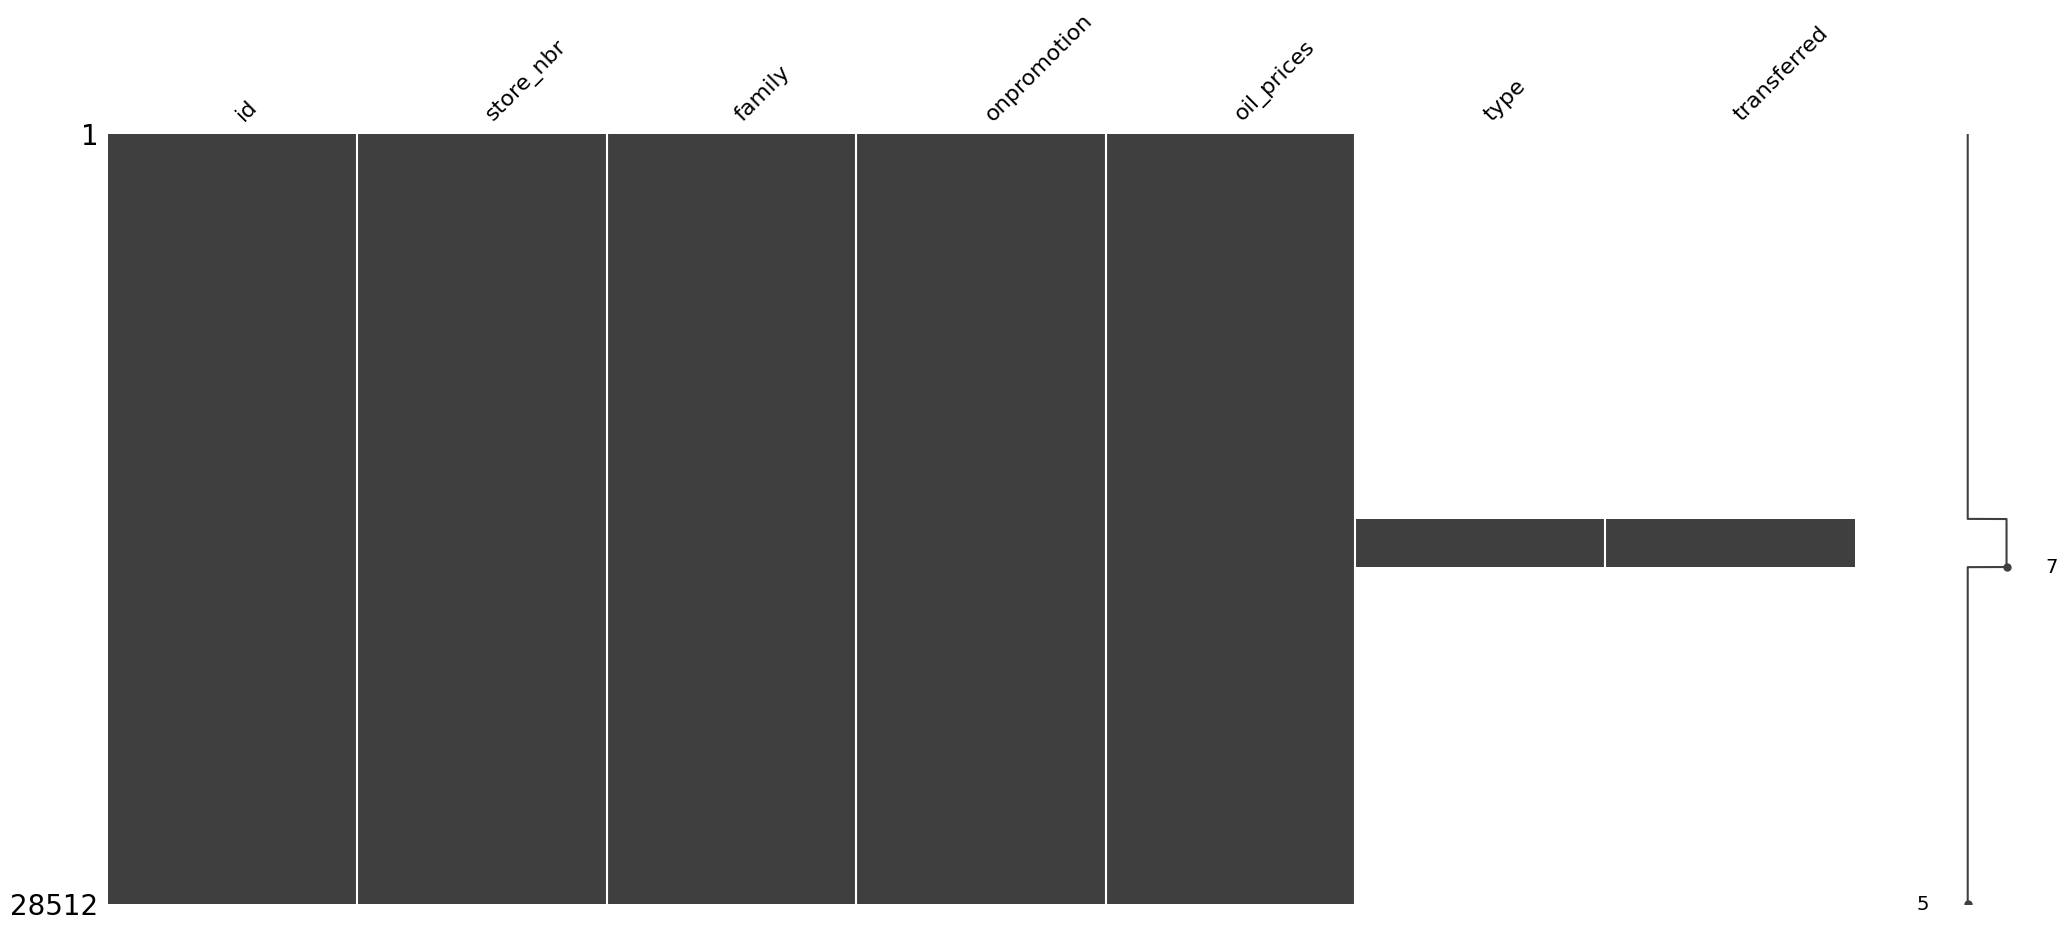

In [99]:
# plot a matrix visualization of missing values in merged_test_holidays_eve_copy
# check how the missing date is distributed through our merged data

msno.matrix(merged_test_holidays_eve_copy)

In [100]:
# Calculate the mode of the 'transfer' column (most frequent category) in merged_test_holidays_eve
mode_transferred = merged_test_holidays_eve['transferred'].mode()[0]

# Impute missing values in the 'transfer' column with the mode
merged_test_holidays_eve['transferred'].fillna(mode_transferred, inplace=True)

# Fill missing values in the 'type' column with 'Work Day'
merged_test_holidays_eve['type'].fillna('Work Day', inplace=True)

merged_test_holidays_eve.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
type           0
transferred    0
dtype: int64

merged datasets
merged_train_holidays_eve (oil + train + holiday events)
merged_test_holidays_eve (oil + test + holiday events)

merged_transactions_store (transactions + stores)

In [101]:
merged_train_holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024054 entries, 0 to 3024053
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
 7   type         object        
 8   transferred  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 187.5+ MB


In [102]:
merged_transactions_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
 3   city          83488 non-null  object        
 4   state         83488 non-null  object        
 5   type          83488 non-null  object        
 6   cluster       83488 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 4.5+ MB


In [103]:
merged_transactions_store.tail()                  

,date,store_nbr,transactions,city,state,type,cluster
83483,2017-08-15,50,2804,Ambato,Tungurahua,A,14
83484,2017-08-15,51,1573,Guayaquil,Guayas,A,17
83485,2017-08-15,52,2255,Manta,Manabi,A,11
83486,2017-08-15,53,932,Manta,Manabi,D,13
83487,2017-08-15,54,802,El Carmen,Manabi,C,3


In [104]:
merged_train_holidays_eve.tail()

,date,oil_prices,id,store_nbr,family,sales,onpromotion,type,transferred
3024049,2017-08-15,47.57,3000883,9,POULTRY,438.133,0,Holiday,False
3024050,2017-08-15,47.57,3000884,9,PREPARED FOODS,154.553,1,Holiday,False
3024051,2017-08-15,47.57,3000885,9,PRODUCE,2419.729,148,Holiday,False
3024052,2017-08-15,47.57,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,False
3024053,2017-08-15,47.57,3000887,9,SEAFOOD,16.000,0,Holiday,False


In [105]:
#check unique characters in 'store_nbr' column of both datasets
# drop 'store_nbr' in merged_transactions_store

print(merged_train_holidays_eve['store_nbr'].nunique())
print(merged_transactions_store['store_nbr'].nunique())

54
54


In [106]:
# drop the following columns in merged_transactions_store using .drop method
# store_nbr, state, type, and cluster

drop_columns = ['state','type','cluster']


merged_transactions_store_dropped=merged_transactions_store.drop(columns=drop_columns)
merged_transactions_store_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
 3   city          83488 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.5+ MB


In [107]:
merged_train_holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024054 entries, 0 to 3024053
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
 7   type         object        
 8   transferred  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 187.5+ MB


In [108]:
merged_train_holidays_eve['transferred'].unique()

array([False,  True])

In [109]:
merged_train_holidays_eve.shape

(3024054, 9)

In [110]:
# merge 'merged_transactions_store_dropped' to merged_train_holidays_eve


# merge merged_train and holidays_eve_train datasets on 'date'
# merge merged_test and holidays_eve_test datasets on 'date'

draft_train = pd.merge(merged_train_holidays_eve, merged_transactions_store_dropped, on=['date','store_nbr'], how='left')
#draft_test = pd.merge(merged_test_holidays_eve, merged_transactions_store_dropped_test, on='date', how='left')
draft_train.shape

(3024054, 11)

In [112]:
draft_train.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type                 0
transferred          0
transactions    247170
city            247170
dtype: int64

In [114]:

# look at missing rows in draft_train
# looks like these missing data in transactions happened during the holidays when stores did not operate

merged_train_missing = draft_train.query('transactions !=transactions ')
print(merged_train_missing.head())


        date  oil_prices  id  store_nbr      family  sales  onpromotion  \
0 2013-01-01   93.139999   0          1  AUTOMOTIVE    0.0            0   
1 2013-01-01   93.139999   1          1   BABY CARE    0.0            0   
2 2013-01-01   93.139999   2          1      BEAUTY    0.0            0   
3 2013-01-01   93.139999   3          1   BEVERAGES    0.0            0   
4 2013-01-01   93.139999   4          1       BOOKS    0.0            0   

      type  transferred  transactions city  
0  Holiday        False           NaN  NaN  
1  Holiday        False           NaN  NaN  
2  Holiday        False           NaN  NaN  
3  Holiday        False           NaN  NaN  
4  Holiday        False           NaN  NaN  


In [115]:
#display random sample of 10 rows

draft_train.sample(10, random_state = 15)

,date,oil_prices,id,store_nbr,family,sales,onpromotion,type,transferred,transactions,city
1063639,2014-08-18,96.440002,1058293,52,HOME AND KITCHEN II,0.000,0,Work Day,False,NaN,NaN
2734771,2017-03-06,53.189999,2711605,41,POULTRY,199.755,1,Work Day,False,1065.0,Machala
1789169,2015-09-29,45.240002,1780259,10,DAIRY,209.000,0,Work Day,False,900.0,Quito
1351737,2015-01-26,44.799999,1342827,36,MEATS,168.706,0,Work Day,False,961.0,Libertad
2055786,2016-02-25,31.400000,2045094,40,HOME CARE,224.000,0,Work Day,False,1329.0,Machala
1915165,2015-12-08,37.459999,1906255,45,EGGS,248.000,0,Holiday,False,3247.0,Quito
1594234,2015-06-11,60.740002,1585324,40,BOOKS,0.000,0,Work Day,False,1299.0,Machala
1489071,2015-04-13,51.950001,1480161,4,GROCERY I,2633.000,9,Work Day,False,1432.0,Quito
2234821,2016-06-01,49.070000,2217001,14,POULTRY,57.313,0,Work Day,False,1330.0,Riobamba
1485906,2015-04-11,51.630001,1476996,50,HOME AND KITCHEN I,63.000,0,Work Day,False,3660.0,Ambato


In [116]:
draft_train.head()

,date,oil_prices,id,store_nbr,family,sales,onpromotion,type,transferred,transactions,city
0,2013-01-01,93.139999,0,1,AUTOMOTIVE,0.0,0,Holiday,False,NaN,NaN
1,2013-01-01,93.139999,1,1,BABY CARE,0.0,0,Holiday,False,NaN,NaN
2,2013-01-01,93.139999,2,1,BEAUTY,0.0,0,Holiday,False,NaN,NaN
3,2013-01-01,93.139999,3,1,BEVERAGES,0.0,0,Holiday,False,NaN,NaN
4,2013-01-01,93.139999,4,1,BOOKS,0.0,0,Holiday,False,NaN,NaN


In [117]:
draft_train['type'].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [118]:
draft_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024054 entries, 0 to 3024053
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   oil_prices    float64       
 2   id            int64         
 3   store_nbr     int64         
 4   family        object        
 5   sales         float64       
 6   onpromotion   int64         
 7   type          object        
 8   transferred   bool          
 9   transactions  float64       
 10  city          object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 233.6+ MB


In [113]:
draft_train.isnull().sum()

date               0
oil_prices         0
id                 0
store_nbr          0
family             0
sales              0
onpromotion        0
type               0
transferred        0
transactions    3564
city            3564
dtype: int64

In [119]:
# Drop one or more columns by specifying their names

draft_train = draft_train.drop(columns='id')
draft_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024054 entries, 0 to 3024053
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   oil_prices    float64       
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   type          object        
 7   transferred   bool          
 8   transactions  float64       
 9   city          object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 210.5+ MB


In [120]:
# Fill missing data in 'transactions' column with zeros
# Fill 'city' column with the mode (most frequent value)

draft_train['transactions'].fillna(0, inplace=True)

mode_city = draft_train['city'].mode()[0]
draft_train['city'].fillna(mode_city, inplace=True)

draft_train.isnull().sum()

date            0
oil_prices      0
store_nbr       0
family          0
sales           0
onpromotion     0
type            0
transferred     0
transactions    0
city            0
dtype: int64

In [122]:
# Set 'date' as the index

draft_train.set_index('date', inplace=True)

In [142]:
# feature engineer year, month, and weekday from data
# display random sample of 5 rows

draft_train['Year'] = draft_train.index.year
draft_train['Month'] = draft_train.index.month
#draft_train['Weekday Name'] = draft_train.index.day_name

draft_train.sample(5, random_state=0)

,oil_prices,store_nbr,family,sales,onpromotion,type,transferred,transactions,city,Year,Month,Weekday Name
date,,,,,,,,,,,,
2015-04-21,55.580002,1,DAIRY,677.000,1,Holiday,False,1780.0,Quito,2015,4,<bound method _inherit_from_data.<locals>.meth...
2016-02-29,32.740002,51,BREAD/BAKERY,878.264,3,Work Day,False,1493.0,Guayaquil,2016,2,<bound method _inherit_from_data.<locals>.meth...
2013-10-13,102.169998,5,FROZEN FOODS,103.000,0,Work Day,False,1403.0,Santo Domingo,2013,10,<bound method _inherit_from_data.<locals>.meth...
2016-03-30,36.910000,17,LINGERIE,1.000,0,Work Day,False,1259.0,Quito,2016,3,<bound method _inherit_from_data.<locals>.meth...
2013-12-27,99.940002,25,PREPARED FOODS,160.000,0,Work Day,False,1949.0,Salinas,2013,12,<bound method _inherit_from_data.<locals>.meth...


## Hypothesis testing

* Null Hypothesis: Promotions have no significant effect on product sales.
* Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional 

In [151]:
# Perform ANOVA
model = ols('sales ~ onpromotion', data=draft_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if any(anova_table['PR(>F)'] < alpha):
    print('At least one promotion has a significant effect on sales.')
else:
    print('None of the promotions have a significant effect on sales.')

# Print the ANOVA table
print(anova_table)

At least one promotion has a significant effect on sales.
                   sum_sq         df              F  PR(>F)
onpromotion  6.773236e+11        1.0  676693.188519     0.0
Residual     3.026869e+12  3024052.0            NaN     NaN


## Conclusion on hypothesis test
* We reject the null hypothesis and conclude that promotions has significant effect on sales

## Test for Stationarity

* Null hypothesis : Series is stationary
* Alternate Hypothesis: Series is not stationary

<Axes: xlabel='date'>

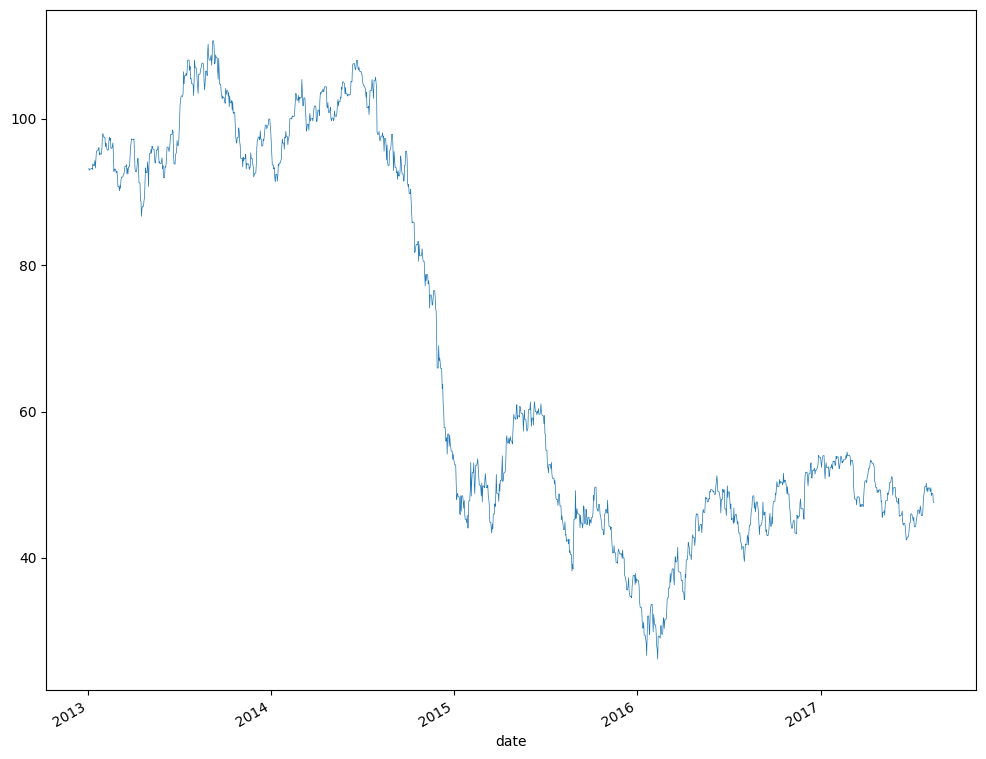

In [124]:
# Visualize data to see pattens of trends and seasonality

plt.figure(figsize=(12,10))
draft_train['oil_prices'].plot(linewidth=0.5)

In [128]:
# test stationarity using KPSS test

stats, p, lags, critical_values = kpss(draft_train['sales'], 'ct')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15864\815769852.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [129]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical Values: {critical_values}')

if p < 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: 1.1746664165303435
p-value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


Check correlation

In [145]:
draft_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3024054 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   oil_prices    float64
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   type          object 
 6   transferred   bool   
 7   transactions  float64
 8   city          object 
 9   Year          int32  
 10  Month         int32  
dtypes: bool(1), float64(3), int32(2), int64(2), object(3)
memory usage: 265.9+ MB


In [148]:
draft_train['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

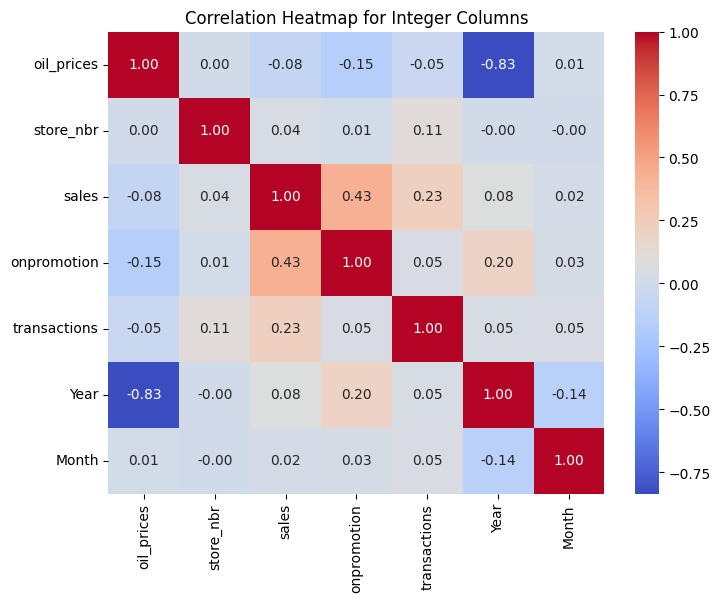

In [147]:
# create a correlation matrix to see which variables are highly correlated
# In general, we want to include variables with high correlation because they are the ones with higher predictive power
# Also gives us an idea on which variables to leave out because they don't affect 'sales' much


# Filter and select only integer columns
integer_columns = draft_train.select_dtypes(include=['int', 'int64', 'int32','float64'])

# Calculate the correlation matrix for the selected integer columns
correlation_matrix = integer_columns.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Heatmap for Integer Columns')
plt.show()